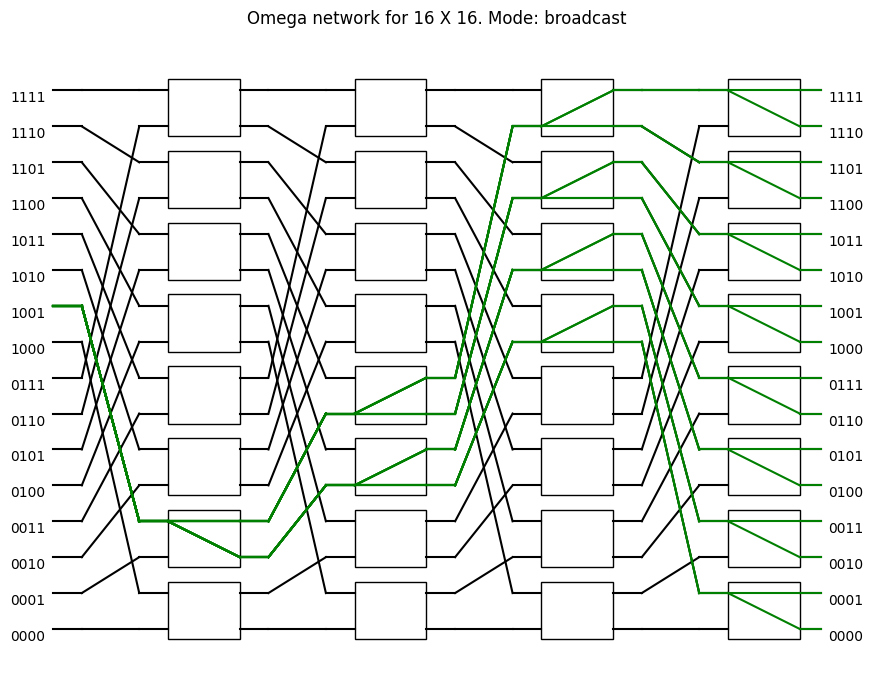

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import math

def dec2bin(decimal, noOfStages):
    binary = bin(decimal)[2:]  # Convert to binary and remove '0b' prefix
    return binary.zfill(noOfStages)

def dec2binint(decimal, noOfStages):
    binaryint = [int(x) for x in bin(decimal)[2:].zfill(noOfStages)]
    return binaryint

def shuffle(inputs, n):
    mid = n // 2
    temp = np.zeros(n, dtype=int)
    
    # First part of the suffled array
    for i in range(mid):
        temp[i] = inputs[i] + i
    
    # Second part of the suffled array
    for j in range(mid):
        temp[mid + j] = inputs[mid + j] - (mid - j - 1)

    for i in range(n):
        inputs[i] = temp[i]

def draw_network(n, paths, mode):
    noOfStages = math.ceil(math.log2(n))
    noOfSwitches = n // 2

    fig, ax = plt.subplots(figsize=(15, 8))
    ax.set_aspect('equal')

    title = f'Omega network for {n} X {n}. Mode: {mode}'
    ax.set_title(title, pad=20)
    ax.axis('off')

    inputs = np.arange(n)
    shuffle(inputs, n)

    y_positions = np.arange(45, 45 + 25 * n, 25)

    # Draw input binary values
    for i in range(n):
        binary = dec2bin(i, noOfStages)
        ax.text(15, 40 + 25 * i, binary, fontsize=10, verticalalignment='center')

    for j in range(noOfStages):
        x1 = 45 + 130 * j
        x2 = 65 + 130 * j

        # Drawing network lines
        for i in range(n):
            ax.plot([x1, x2], [45 + 25 * i, 45 + 25 * i], color='black')
            ax.plot([x1 + 20, x2 + 40], [45 + 25 * i, 45 + 25 * inputs[i]], color='black')
            ax.plot([x1 + 60, x2 + 60], [45 + 25 * inputs[i], 45 + 25 * inputs[i]], color='black')

        # Drawing switches
        for i in range(noOfSwitches):
            ax.add_patch(plt.Rectangle((x2 + 60, 38 + 50 * i), 50, 40, edgecolor='black', facecolor='none'))

    # Draw output binary values
    for i in range(n):
        binary = dec2bin(i, noOfStages)
        ax.text(x2 + 130, 40 + 25 * i, binary, fontsize=10, verticalalignment='center')
        ax.plot([x2 + 110, x2 + 125], [45 + 25 * i, 45 + 25 * i], color='black')

    # Draw the data path
    def draw_path(inp, data, color):
        binaryint = dec2binint(data, noOfStages)
        y = 45
        y1 = y

        for j in range(noOfStages):
            x1 = 45 + 130 * j
            x2 = 65 + 130 * j

            ax.plot([x1, x2], [y + 25 * inp, y + 25 * inp], color=color)
            ax.plot([x1 + 20, x2 + 40], [y + 25 * inp, y + 25 * inputs[inp]], color=color)
            ax.plot([x1 + 60, x2 + 60], [y + 25 * inputs[inp], y + 25 * inputs[inp]], color=color)

            inp = inputs[inp]

            if binaryint[j] == 1:
                if inp % 2 == 0:
                    y1 = y + 25
                else:
                    y1 = y
            else:
                if inp % 2 == 1:
                    y1 = y - 25
                else:
                    y1 = y

            ax.plot([x2 + 60, x2 + 110], [y + 25 * inp, y1 + 25 * inp], color=color)

            if binaryint[j] == 1:
                if inp % 2 == 0:
                    inp = inp + 1
            else:
                if inp % 2 == 1:
                    inp = inp - 1

        ax.plot([x2 + 110, x2 + 125], [45 + 25 * inp, 45 + 25 * inp], color=color)

    for path in paths:
        draw_path(path[0], path[1], 'green')

    plt.show()

def main():
    n = int(input("Enter the number of inputs (N): "))
    while n % 2 != 0:
        print("Invalid. N must be in denomination of 2")
        n = int(input("Enter the number of inputs (N): "))

    mode = input("Enter the mode (single/multicast/broadcast/n2n): ").strip().lower()
    while mode not in ["single", "multicast", "broadcast", "n2n"]:
        print("Invalid mode. Please enter 'single', 'multicast', 'broadcast' or 'n2n'.")
        mode = input("Enter the mode (single/multicast/broadcast/n2n): ").strip().lower()

    paths = []
    if mode == "single":
        inp = int(input("Enter the input, where the data starts its transmission: "))
        while inp >= n:
            print("Invalid. Input can't exceed N.")
            inp = int(input("Enter the input, where the data starts its transmission: "))

        data = int(input("Enter the output, where data ends its journey: "))
        while data >= n:
            print("Invalid. Output can't exceed N.")
            data = int(input("Enter the output, where data ends its journey: "))
        paths.append((inp, data))
    elif mode == "multicast":
        inp = int(input("Enter the input, where the data starts its transmission: "))
        while inp >= n:
            print("Invalid. Input can't exceed N.")
            inp = int(input("Enter the input, where the data starts its transmission: "))

        data = input("Enter the outputs (comma-separated) where data ends its journey: ").split(',')
        data = [int(d) for d in data]
        if any(d >= n for d in data):
            print("Invalid. Outputs can't exceed N.")
        else:
            for d in data:
                paths.append((inp, d))
    elif mode == "broadcast":
        inp = int(input("Enter the input, where the data starts its transmission: "))
        while inp >= n:
            print("Invalid. Input can't exceed N.")
            inp = int(input("Enter the input, where the data starts its transmission: "))

        for d in range(n):
            paths.append((inp, d))
    elif mode == "n2n":
        inputs = input("Enter the inputs (comma-separated) where the data starts its transmission: ").split(',')
        outputs = input("Enter the corresponding outputs (comma-separated): ").split(',')
        if len(inputs) != len(outputs):
            print("The number of inputs must match the number of outputs.")
        else:
            inputs = [int(i) for i in inputs]
            outputs = [int(o) for o in outputs]
            if any(i >= n for i in inputs) or any(o >= n for o in outputs):
                print("Invalid. Inputs and outputs can't exceed N.")
            else:
                for inp, out in zip(inputs, outputs):
                    paths.append((inp, out))

    draw_network(n, paths, mode)

if __name__ == "__main__":
    main()
